In [4]:
from ntspec import ntbremss
import matplotlib.pyplot as plt
import numpy as np
import ntspec
import scipy
from scipy.integrate import trapezoid


In [33]:
hxr_dic = ntbremss(Ecut=15,Emax=5e4,delta=8.0,Eflux=3e9,calc_cttm=1)
hxr_dic_lower = ntbremss(Ecut=5,Emax=5e4,delta=8.0,Eflux=3e9,calc_cttm=1)
hxr_dic_higher = ntbremss(Ecut=50,Emax=5e4,delta=8.0,Eflux=3e9,calc_cttm=1)

given the limits of the STIX counts during the times of hte observations, what HXR area must one have to give those counts at the STIX spacecraft

In [35]:
inds1 = np.where(np.logical_and(hxr_dic['eps_arr']>4,hxr_dic['eps_arr']<10))
inds2 = np.where(np.logical_and(hxr_dic['eps_arr']>10,hxr_dic['eps_arr']<15))
inds3 = np.where(np.logical_and(hxr_dic['eps_arr']>15,hxr_dic['eps_arr']<25))

I_keV_thick = hxr_dic['I_keV_thick']
energies = hxr_dic['eps_arr']

I_keV_thick_lower= hxr_dic_lower['I_keV_thick']
energies_lower= hxr_dic_lower['eps_arr']

I_keV_thick_higher= hxr_dic_higher['I_keV_thick']
energies_higher= hxr_dic_higher['eps_arr']

In [36]:
# integrated energy - in photons/s/cm2

band1 = trapezoid(I_keV_thick[inds1],energies[inds1[0]])
band2 = trapezoid(I_keV_thick[inds2],energies[inds2[0]])
band3 = trapezoid(I_keV_thick[inds3],energies[inds3[0]])

(0.5, 40000.0)

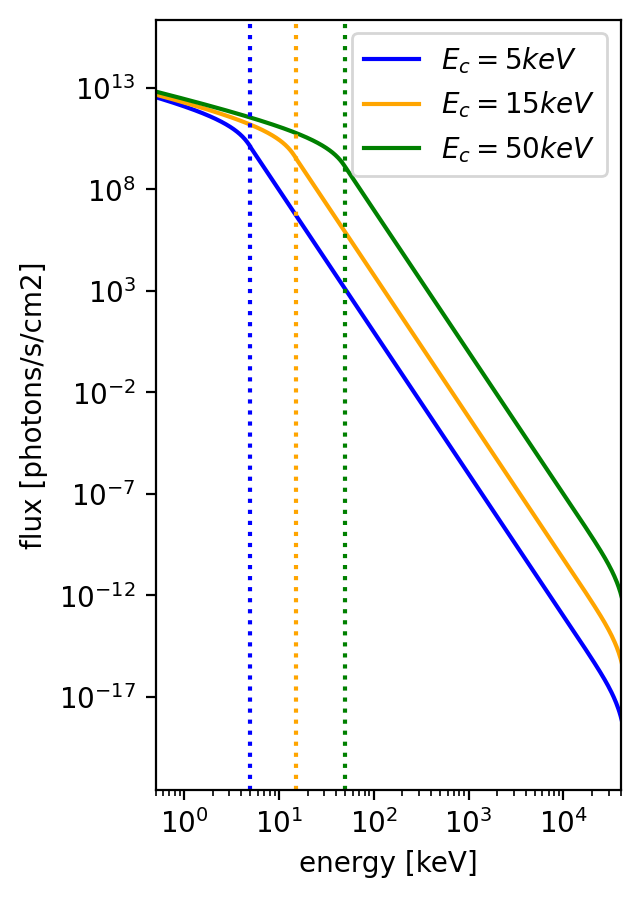

In [37]:
fig,ax=plt.subplots(figsize=(3,5),dpi=200)
ax.loglog(energies_lower,I_keV_thick_lower,label=r'$E_c = 5 keV$',c='blue')
ax.loglog((energies),(I_keV_thick),label=r'$E_c = 15 keV$',c='orange')
ax.loglog(energies_higher,I_keV_thick_higher,label=r'$E_c = 50 keV$',c='green')
ax.set_ylabel('flux [photons/s/cm2]')
ax.set_xlabel('energy [keV]')
ax.legend()
ax.axvline(15,c='orange',linestyle='dotted')
ax.axvline(5,c='blue',linestyle='dotted')
ax.axvline(50,c='green',linestyle='dotted')
ax.set_xlim([0.5,4e4])


In [38]:
band1/band2

np.float64(8.598763689583516)

In [39]:
# counts at times of obs - divide by 4s (4s bins)
counts_band1 = 18.5
counts_band2 = 22
counts_band3 = 24
counts_band4 = 735
bounts_band5 = 367

eff_area = 6e-4 #in m2
dist_tosun = 127863685*1000 # in m


def emit_area(peakcounts_stix,peakemission_model,dist_tosun=dist_tosun,det_area=eff_area):
    return ((peakcounts_stix * (4 * np.pi * dist_tosun**2)/2)/peakemission_model/det_area)/1e4/4 #/2 for solid angle because isotropic in forward atmosphere #output will be in cm2, convert to m2

emit_area1 = emit_area(counts_band1,band1)
emit_area2 = emit_area(counts_band2,band2)
emit_area3 = emit_area(counts_band3,band3)

In [46]:
print('Areas, in arcsec^2')

print(emit_area2/727000**2)
print(emit_area3/727000**2)
print('')

print('Lengths, in arcsec')
print(2*np.sqrt(emit_area2/np.pi)/727000)
print(2*np.sqrt(emit_area3/np.pi)/727000)
print('')

Areas, in arcsec^2
2.8326147928033985
26.84886390302357

Lengths, in arcsec
1.8991043070877087
5.846797007981555



In [48]:
# now for higher-energy beam
hxr_dic2 = ntbremss(Ecut=15,Emax=5e4,delta=8.0,Eflux=3e10,calc_cttm=1)

inds1 = np.where(np.logical_and(hxr_dic2['eps_arr']>4,hxr_dic['eps_arr']<10))
inds2 = np.where(np.logical_and(hxr_dic2['eps_arr']>10,hxr_dic['eps_arr']<15))
inds3 = np.where(np.logical_and(hxr_dic2['eps_arr']>15,hxr_dic['eps_arr']<25))

I_keV_thick = hxr_dic2['I_keV_thick']
energies = hxr_dic2['eps_arr']

# integrated energy - in photons/s/cm2

band1 = trapezoid(I_keV_thick[inds1],energies[inds1[0]])
band2 = trapezoid(I_keV_thick[inds2],energies[inds2[0]])
band3 = trapezoid(I_keV_thick[inds3],energies[inds3[0]])

# peak-to-peak noise in obs - divide by 4s (4s bins)
#counts_band1 = 1727
counts_band2 = 7.3
counts_band3 = 24
#counts_band4 = 735
#bounts_band5 = 367

eff_area = 6e-4 #in cm2
dist_tosun = 127863685*1000 # in m

#peakcounts_stix #in counts/s after division by 4



#emit_area1 = emit_area(counts_band1,band1)
emit_area2 = emit_area(counts_band2,band2)
emit_area3 = emit_area(counts_band3,band3)

print('Areas, in arcsec^2')

#print(emit_area1/727000**2)
print(emit_area2/727000**2)
print(emit_area3/727000**2)
print('')

print('Lengths, in arcsec')
#print(np.sqrt(emit_area1)/727000)
print(2*np.sqrt(emit_area2/np.pi)/727000)
print(2*np.sqrt(emit_area3/np.pi)/727000)
print('')


Areas, in arcsec^2
0.09399130903393095
2.684886390302358

Lengths, in arcsec
0.3459385082979694
1.8489195561879401



In [27]:
# now for higher-energy beam
hxr_dic2 = ntbremss(Ecut=15,Emax=5e4,delta=3.0,Eflux=1e11,calc_cttm=1)

inds1 = np.where(np.logical_and(hxr_dic2['eps_arr']>4,hxr_dic['eps_arr']<10))
inds2 = np.where(np.logical_and(hxr_dic2['eps_arr']>10,hxr_dic['eps_arr']<15))
inds3 = np.where(np.logical_and(hxr_dic2['eps_arr']>15,hxr_dic['eps_arr']<25))

I_keV_thick = hxr_dic2['I_keV_thick']
energies = hxr_dic2['eps_arr']

# integrated energy - in photons/s/cm2

band1 = trapezoid(I_keV_thick[inds1],energies[inds1[0]])
band2 = trapezoid(I_keV_thick[inds2],energies[inds2[0]])
band3 = trapezoid(I_keV_thick[inds3],energies[inds3[0]])

# peak-to-peak noise in obs - divide by 4s (4s bins)
#counts_band1 = 1727
counts_band2 = 22
counts_band3 = 24
#counts_band4 = 735
#bounts_band5 = 367

eff_area = 6e-4 #in cm2
dist_tosun = 127863685*1000 # in m

#peakcounts_stix #in counts/s after division by 4



#emit_area1 = emit_area(counts_band1,band1)
emit_area2 = emit_area(counts_band2,band2)
emit_area3 = emit_area(counts_band3,band3)

print('Areas, in arcsec^2')

#print(emit_area1/727000**2)
print(emit_area2/727000**2)
print(emit_area3/727000**2)
print('')

print('Lengths, in arcsec')
#print(np.sqrt(emit_area1)/727000)
print(2*np.sqrt(emit_area2/np.pi)/727000)
print(2*np.sqrt(emit_area3/np.pi)/727000)
print('')


Areas, in arcsec^2
0.018393344018267165
0.027078190949789492

Lengths, in arcsec
0.15303311067862313
0.1856798952960761



In [24]:
#and for the recorded amount in band2 above background
hxr_dic2 = ntbremss(Ecut=15,Emax=5e4,delta=8.0,Eflux=3e10,calc_cttm=1)

inds1 = np.where(np.logical_and(hxr_dic2['eps_arr']>4,hxr_dic['eps_arr']<10))
inds2 = np.where(np.logical_and(hxr_dic2['eps_arr']>10,hxr_dic['eps_arr']<15))
inds3 = np.where(np.logical_and(hxr_dic2['eps_arr']>15,hxr_dic['eps_arr']<25))

I_keV_thick = hxr_dic2['I_keV_thick']
energies = hxr_dic2['eps_arr']

# integrated energy - in photons/s/cm2

band1 = trapezoid(I_keV_thick[inds1],energies[inds1[0]])
band2 = trapezoid(I_keV_thick[inds2],energies[inds2[0]])
band3 = trapezoid(I_keV_thick[inds3],energies[inds3[0]])

# peak-to-peak noise in obs - divide by 4s (4s bins)
#counts_band1 = 1727
counts_band2 = 83-35
#counts_band4 = 735
#bounts_band5 = 367

eff_area = 6e-4 #in cm2
dist_tosun = 127863685*1000 # in m

#peakcounts_stix #in counts/s after division by 4



#emit_area1 = emit_area(counts_band1,band1)
emit_area2 = emit_area(counts_band2,band2)
emit_area3 = emit_area(counts_band3,band3)

print('Areas, in arcsec^2')

#print(emit_area1/727000**2)
print(emit_area2/727000**2)
print('')

print('Lengths, in arcsec')
#print(np.sqrt(emit_area1)/727000)
print(2*np.sqrt(emit_area2/np.pi)/727000)


Areas, in arcsec^2
0.6180250457025596

Lengths, in arcsec
0.8870704187522291
